## P7.5.1
-----

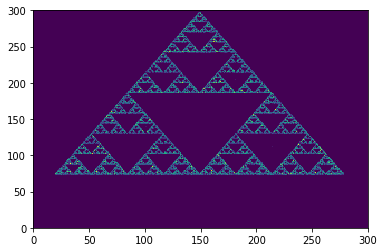

In [7]:
import numpy as np
import matplotlib.pyplot as plt

image_size = np.array((300, 300))
r, num_sides, num_points = 0.5, 3, 50000

polygon = np.zeros((num_points, 2))

polygon = [
    (np.cos(phi) + 1, np.sin(phi) + 1)
    for phi in np.arange(0, 2 * np.pi, 2.0 * np.pi / num_sides)
]

points = np.array(polygon) * 0.5 * (image_size - 1)

p_1 = np.array(image_size / 2)
aimg = np.zeros(image_size)


for i in range(num_points):
    irow = np.random.randint(num_sides)
    p_2 = points[irow]
    p_1 = p_1 * r + p_2 * (1 - r)
    aimg[tuple(p_1.astype(int))] += 1
plt.pcolor(aimg)
plt.show()


## P7.5.2
-----

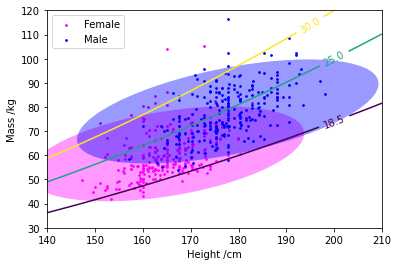

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

FEMALE, MALE = 0, 1
dt = np.dtype([("mass", "f8"), ("height", "f8"), ("gender", "i2")])
data = np.loadtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/body.dat.txt",
    usecols=(22, 23, 24),
    dtype=dt,
)

fig, ax = plt.subplots()


def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by
    vx, vy = eigvecs[:, 0][0], eigvecs[:, 0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(
        xy=centre, width=width, height=height, angle=np.degrees(theta), **kwargs
    )


labels, colours = ["Female", "Male"], ["magenta", "blue"]
for gender in (FEMALE, MALE):
    sdata = data[data["gender"] == gender]
    height_mean = np.mean(sdata["height"])
    mass_mean = np.mean(sdata["mass"])
    cov = np.cov(sdata["mass"], sdata["height"])
    ax.scatter(
        sdata["height"], sdata["mass"], color=colours[gender], label=labels[gender], s=3
    )
    e = get_cov_ellipse(cov, (height_mean, mass_mean), 3, fc=colours[gender], alpha=0.4)
    ax.add_artist(e)

# START OF ADDED CODE
H, M = np.meshgrid(np.linspace(140, 210, 100), np.linspace(30, 120, 100))

bmi = M / (H / 100) ** 2
bmi_levels = [18.5, 25, 30]

colormap = ax.contour(H, M, bmi, levels=bmi_levels)
label_positions = [
    (lh, bmi_levels[i] * (lh / 100) ** 2) for i, lh in enumerate((200, 200, 195))
]

ax.clabel(colormap, inline=1, fontsize=10, manual=label_positions, fmt="%1.1f")
# END OF ADDED CODE

ax.set_xlim(140, 210)
ax.set_ylim(30, 120)
ax.set_xlabel("Height /cm")
ax.set_ylabel("Mass /kg")
ax.legend(loc="upper left", scatterpoints=1)
plt.show()


## P7.5.3
-----

C:\Users\Arjun Sarao\AppData\Local\Temp\ipykernel_16148\139404249.py:38: RuntimeWarning: invalid value encountered in true_divide
  v = v_0 * np.dstack((rx, -ry)) / r[..., np.newaxis]


0 1
1000 2
2500 3
5000 4


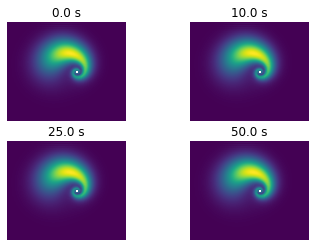

In [28]:
import numpy as np
import matplotlib.pyplot as plt



def timestep(u_0: np.ndarray, u: np.ndarray, dt=0.01, dx=0.1, dy=0.1):
    """
    Compute the timestep of the heat equation.
    """
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] - dt * (
          v[1:-1, 1:-1, 1] * (u0[1:-1, 2:] - u0[1:-1, :-2])/2/dx +
          v[1:-1, 1:-1, 0] * (u0[2:, 1:-1] - u0[:-2, 1:-1])/2/dy)

    u_0 = u.copy()
    return u_0, u


w, h, = (
    12.0,
    10.0,
)
dy, dx, dt = 0.1, 0.1, 0.01
nx, ny = int(w/dx), int(h/ dy)

u_0 = np.zeros((ny, nx))
u = np.zeros((ny, nx))

x, y = np.meshgrid(np.arange(0, nx * dx, dx), np.arange(0, ny * dy, dy))

cx, cy, alpha = 5, 5, 2

u_0 = np.exp(-((x - cx) ** 2 + (y - cy) ** 2) / (alpha**2))

cx, cy, v_0 = 7, 5, 0.05
rx, ry = x - cx, y - cy
r = np.hypot(rx, ry)

v = v_0 * np.dstack((rx, -ry)) / r[..., np.newaxis]
v[np.isnan(v)] == 0

nsteps = 5001
# Output 4 figures at these timesteps
mfig = [0, 1000, 2500, 5000]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u_0, u = timestep(u_0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy())
        ax.set_axis_off()
        ax.set_title('{:.1f} s'.format(m*dt))
plt.show()


## P7.5.4
-----

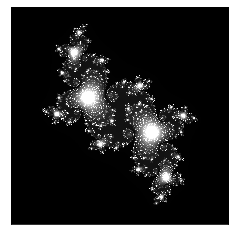

In [31]:
import numpy as np
import matplotlib.pyplot as plt

img_width, img_height = 500, 500
c = complex(-0.1, 0.65)
zabs_max = 10
nit_max = 1000
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

julia = np.zeros((img_height, img_width))
for i_x in range(img_width):
    for i_y in range(img_height):
        nit = 0
        # Map pixel position to a point in the complex plane
        z = complex(i_x / img_width * xwidth + xmin,
                    i_y / img_height * yheight + ymin)
        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**2 + c
            nit += 1
        shade = 1-np.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[i_x,i_y] = ratio

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(julia, cmap='gray', interpolation='nearest')
ax.set_xlim(0, img_width)
ax.set_ylim(0, img_height)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## P7.5.5
-----

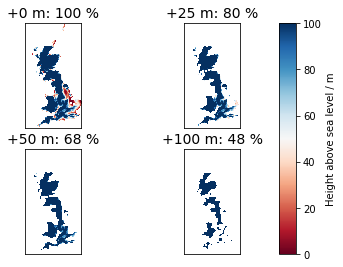

In [38]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/gb-alt.npy")
area0 = np.sum(data>0) * 100

fig, axes = plt.subplots(nrows=2, ncols=2)

for i, sealevel in enumerate((0, 25, 50, 100)):
    ax = axes[i//2, i%2]
    area = np.sum(data>sealevel) * 100
    area_copy = data.copy()
    area_copy[area_copy<=sealevel] = np.nan
    im = ax.imshow(area_copy, cmap='RdBu', vmin=0, vmax=100)
    ax.set_title(f"{sealevel} m")
    ax.set_xticks([])
    ax.set_yticks([])
    percent_area = int(area / area0 * 100)
    ax.set_title(f"+{sealevel:d} m: {percent_area:d} %",fontsize=14)

fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cbar_ax = fig.add_axes([0.8, 0.1, 0.04, 0.8])
cbar = fig.colorbar(im, cax=cbar_ax, label="Height above sea level / m")
cbar.set_label("Height above sea level / m")
plt.show()